    X         Y
0   1  3.888889
1   2  4.555556
2   3  5.222222
3   4  5.888889
4   5  6.555556
5   6  7.222222
6   7  7.888889
7   8  8.555556
8   9  9.222222
9  10  9.888889
Index(['X', 'Y'], dtype='object')
Custom Linear Regression (No Class)
θ0 (bias): 5.8888
θ1 (coef): 0.6400
MSE: 262.22981
MAE: 3.49070
R2 Score: 0.92136
Training Time: 0.000858 seconds


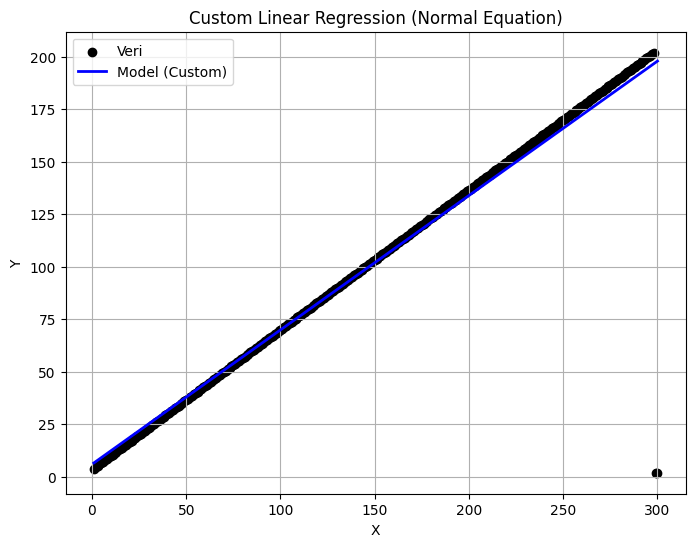

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("Linear Regression - Sheet1.csv")
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)
print(df.head(10))
print(df.columns)

X_b = np.hstack([np.ones((X.shape[0], 1)), X])
start_time = time.time()
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
train_time = time.time() - start_time
y_pred = X_b @ theta

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Custom Linear Regression (No Class)")
print(f"θ0 (bias): {theta[0][0]:.4f}")
print(f"θ1 (coef): {theta[1][0]:.4f}")
print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R2 Score: {r2:.5f}")
print(f"Training Time: {train_time:.6f} seconds")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Veri')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Model (Custom)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Custom Linear Regression (Normal Equation)")
plt.legend()
plt.grid(True)
plt.show()

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No            9   
6              7               73                        Yes            5   
7              8               45                        Yes            4   
8              5               77                         No            8   
9              4               89                         No            4   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2   

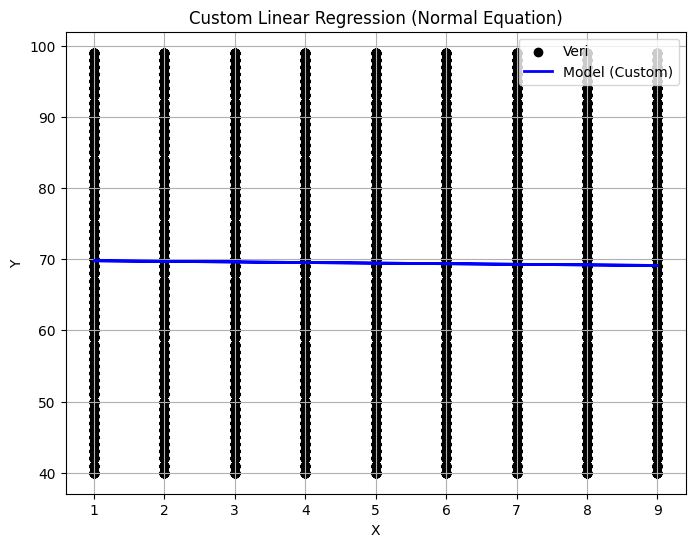

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("Student_Performance.csv")
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)
print(df.head(10))
print(df.columns)

X_b = np.hstack([np.ones((X.shape[0], 1)), X])

start_time = time.time()
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
train_time = time.time() - start_time
y_pred = X_b @ theta

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Custom Linear Regression (No Class)")
print(f"θ0 (bias): {theta[0][0]:.4f}")
print(f"θ1 (coef): {theta[1][0]:.4f}")
print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R2 Score: {r2:.5f}")
print(f"Training Time: {train_time:.6f} seconds")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Veri')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Model (Custom)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Custom Linear Regression (Normal Equation)")
plt.legend()
plt.grid(True)
plt.show()


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No            9   
6              7               73                        Yes            5   
7              8               45                        Yes            4   
8              5               77                         No            8   
9              4               89                         No            4   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2   

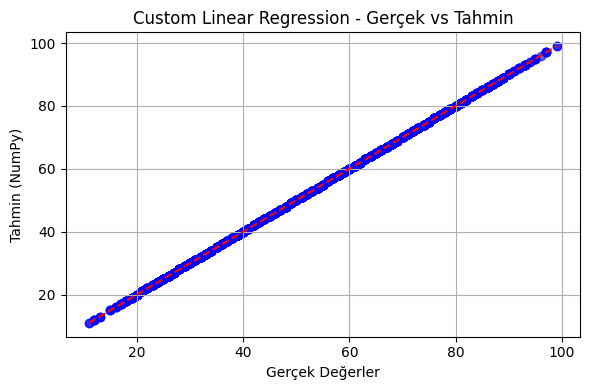

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt

df = pd.read_csv('Student_Performance.csv')
print(df.head(10))
print(df.columns)
X = df.drop(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'], axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_time = time.time()
X_train_bir = np.c_[np.ones(X_train.shape[0]), X_train]  # X'e bir sütun daha ekliyoruz (bias)
theta = np.linalg.inv(X_train_bir.T @ X_train_bir) @ X_train_bir.T @ y_train  # Parametreler
X_test_bir = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_numpy = X_test_bir @ theta

mse_numpy = mean_squared_error(y_test, y_pred_numpy)
r2_numpy = r2_score(y_test, y_pred_numpy)
numpy_time = time.time() - start_time

print(f"NumPy ile en küçük kareler yöntemi - MSE: {mse_numpy}, R2: {r2_numpy}, Zaman: {numpy_time} saniye")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_numpy, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin (NumPy)")
plt.title("Custom Linear Regression - Gerçek vs Tahmin")
plt.grid(True)
plt.tight_layout()
plt.show()
